# 1. Setup and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [ ]:
try:
    df = pd.read_csv('../data/raw/data.csv')
except FileNotFoundError:
    print("Error: Make sure the raw data is in the 'data/raw/' directory.")
    exit()

# 2. Initial Inspection

In [4]:
print("--- Initial Data Info ---")
df.info()

print("\n--- Summary Statistics (Numerical) ---")
print(df.describe())

print("\n--- First 5 Rows ---")
print(df.head())


--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64 

# 3. Validate EDA Insights

# Insight 1: Transaction Activity is Dominated by a Few Key Categories

In [5]:

print("\n--- Insight 1: Category Dominance ---")
print("\nProduct Category Distribution:")
print(df['ProductCategory'].value_counts(normalize=True).head())

print("\nProvider ID Distribution:")
print(df['ProviderId'].value_counts(normalize=True).head())

print("\nChannel ID Distribution:")
print(df['ChannelId'].value_counts(normalize=True).head())


--- Insight 1: Category Dominance ---

Product Category Distribution:
ProductCategory
financial_services    0.474640
airtime               0.470688
utility_bill          0.020071
data_bundles          0.016861
tv                    0.013370
Name: proportion, dtype: float64

Provider ID Distribution:
ProviderId
ProviderId_4    0.399208
ProviderId_6    0.357362
ProviderId_5    0.152014
ProviderId_1    0.058989
ProviderId_3    0.032239
Name: proportion, dtype: float64

Channel ID Distribution:
ChannelId
ChannelId_3    0.595168
ChannelId_2    0.388252
ChannelId_5    0.010955
ChannelId_1    0.005624
Name: proportion, dtype: float64


In [6]:
# Confirm constant columns
print(f"\nUnique Country Codes: {df['CountryCode'].unique()}")
print(f"Unique Currency Codes: {df['CurrencyCode'].unique()}")


Unique Country Codes: [256]
Unique Currency Codes: ['UGX']


# Insight 2: Transaction Values are Heavily Right-Skewed


--- Insight 2: Skewness of Transaction Value ---


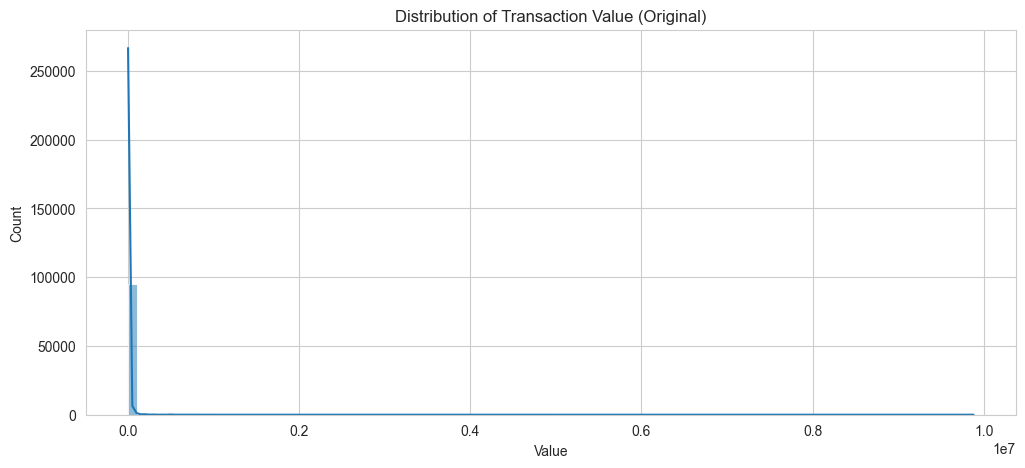

In [7]:
print("\n--- Insight 2: Skewness of Transaction Value ---")
plt.figure(figsize=(12, 5))
sns.histplot(df['Value'], bins=100, kde=True)
plt.title('Distribution of Transaction Value (Original)')
plt.xlabel('Value')
plt.show()


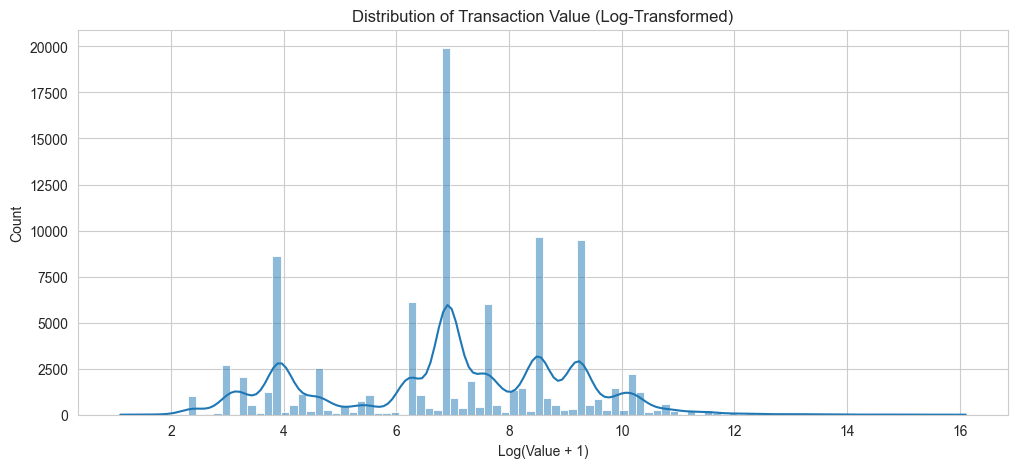

In [8]:
# Let's see the distribution of the log-transformed value
plt.figure(figsize=(12, 5))
sns.histplot(np.log1p(df['Value']), bins=100, kde=True) # Use log1p to handle zeros
plt.title('Distribution of Transaction Value (Log-Transformed)')
plt.xlabel('Log(Value + 1)')
plt.show()
# The log-transformed version is much more suitable for modeling.

# Insight 3: Transaction Timestamps Reveal Clear Behavioral Patterns

In [9]:
print("\n--- Insight 3: Temporal Patterns ---")
# First, convert to datetime object
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])


--- Insight 3: Temporal Patterns ---


In [10]:
# Extract temporal features
df['hour_of_day'] = df['TransactionStartTime'].dt.hour
df['day_of_week'] = df['TransactionStartTime'].dt.day_name()

C:\Users\Bisrat\AppData\Local\Temp\ipykernel_10300\2001421437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hour_of_day', palette='viridis')


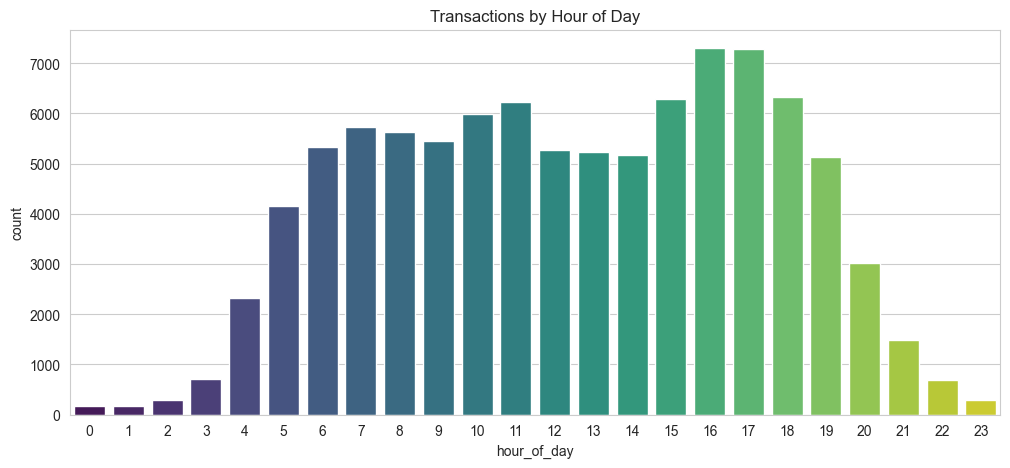

In [11]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='hour_of_day', palette='viridis')
plt.title('Transactions by Hour of Day')
plt.show()

C:\Users\Bisrat\AppData\Local\Temp\ipykernel_10300\2189402466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='mako')


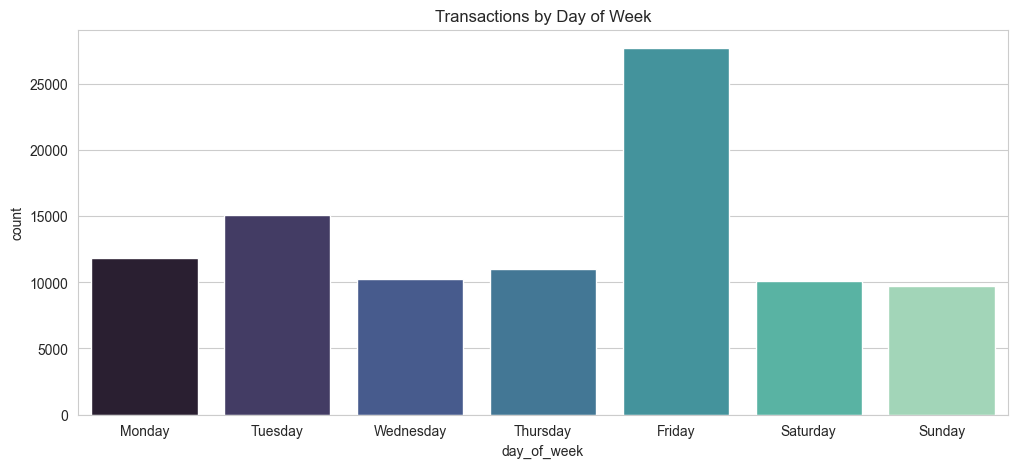

In [12]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='mako')
plt.title('Transactions by Day of Week')
plt.show()

# Insight 4: Identifier Columns Have High Cardinality 

In [13]:
print("\n--- Insight 4: Feature Cardinality ---")
print(df.nunique().sort_values(ascending=False))


--- Insight 4: Feature Cardinality ---
TransactionId           95662
BatchId                 94809
TransactionStartTime    94556
CustomerId               3742
AccountId                3633
SubscriptionId           3627
Amount                   1676
Value                    1517
hour_of_day                24
ProductId                  23
ProductCategory             9
day_of_week                 7
ProviderId                  6
ChannelId                   4
PricingStrategy             4
FraudResult                 2
CountryCode                 1
CurrencyCode                1
dtype: int64


# 4. Check for Missing Values & Duplicates

In [15]:
print("\n--- Data Quality Checks ---")
print("\nMissing Values:")
print(df.isnull().sum()) # Looks clean, no missing values.


--- Data Quality Checks ---

Missing Values:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
hour_of_day             0
day_of_week             0
dtype: int64


In [16]:
print("\nDuplicate Transactions:")
print(f"Number of duplicate rows: {df.duplicated().sum()}") # No duplicates.


Duplicate Transactions:
Number of duplicate rows: 0
